In [32]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
rideData = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cityRide  = pd.merge(rideData, cityData, how = "left", on="city")


# Display the data table for preview
cityRide.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [31]:
crobject = cityRide.groupby("type")
crgby = pd.DataFrame(crobject["driver_count"].sum())
crgby

,driver_count
type,
Rural,537
Suburban,8570
Urban,59602


## Bubble Plot of Ride Sharing Data

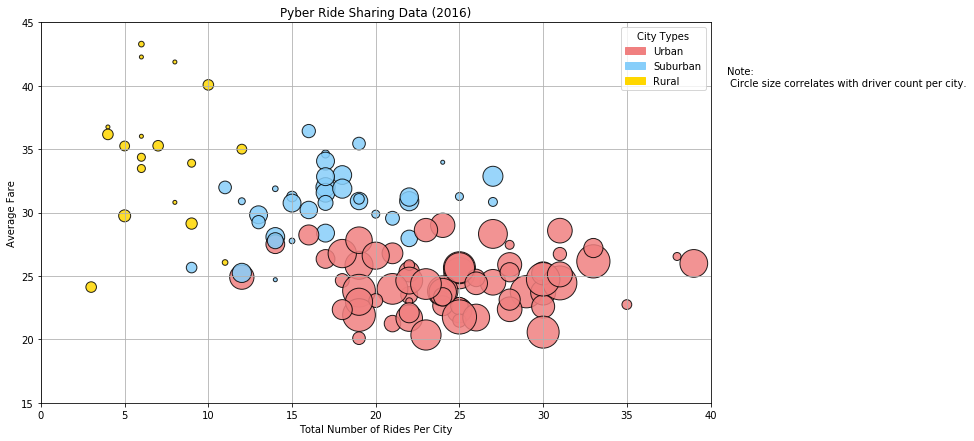

In [33]:
# Obtain the x and y coordinates for each of the three city types
#create group by from rideData table
cityRideGroupByObject = rideData.groupby(["city"])
#create dataframe from group by object and calculate average fare (y-axis)
cityRideGroupBy = pd.DataFrame(cityRideGroupByObject["fare"].mean())
#calculate total number of rides per city (x-axis)
cityRideGroupBy["Total Number of Rides Per City"] = cityRideGroupByObject["ride_id"].nunique()
#rename y-axis from fare to average fare
cityRideGroupBy.rename(columns={"fare":"Average Fare"},inplace=True)
#merge with cityData to get city type data
cityRideGroupBy = pd.merge(cityRideGroupBy, cityData, how = "left", on="city")
#create color indicator for each city type
cityRideGroupBy["type color"] = cityRideGroupBy["type"]
cityRideGroupBy.loc[:, "type color"].replace(["Urban", "Suburban", "Rural"], ["lightcoral", "lightskyblue", "Gold"]
                                             ,inplace=True)

# Build the scatter plots for each city types
colors= cityRideGroupBy["type color"].values

scatterPlot = cityRideGroupBy.plot(kind="scatter", x="Total Number of Rides Per City", y="Average Fare", 
              sizes=cityRideGroupBy['driver_count']*16 ,
              grid=True, figsize=(12, 7), 
              color=colors,
              alpha=0.85,
              edgecolors="black",
              title="Pyber Ride Sharing Data (2016)",
              linewidths=1,legend=True
               )
# Incorporate the other graph properties
plt.xlim((0, 40))
plt.ylim(15, 45)
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare')

# Create a legend
urban = mpatches.Patch(color='lightcoral', label='Urban')
suburban = mpatches.Patch(color='lightskyblue', label='Suburban')
rural = mpatches.Patch(color='Gold', label='Rural')
plt.legend(title="City Types", handles=[urban, suburban, rural])

# Incorporate a text label regarding circle size
scatterPlot.text(41, 40, "Note:\n Circle size correlates with driver count per city.", ha='left')
# Save Figure
plt.savefig("plot1.pdf")


## Total Fares by City Type

In [38]:
# Calculate Type Percents
#create group by from cityRideGroupBy
cityRideGroupByType = cityRideGroupBy.groupby("type") 
#sum of all the total number of rides per city as Total rides per city type
cityRideCityType = pd.DataFrame(cityRideGroupByType["Total Number of Rides Per City"].sum())
#rename column
cityRideCityType.rename(columns={"Total Number of Rides Per City": "Total Rides"}, inplace = True)
#average of average fare per city
cityRideCityType["Avg Fare"] = cityRideGroupByType["Average Fare"].mean()
#calculate total fare from avg fare and total rides
cityRideCityType["Total Fare"] = cityRideCityType["Avg Fare"]*cityRideCityType["Total Rides"]
#sum of all the drivers
cityRideCityType["Total Drivers"] = cityRideGroupByType["driver_count"].sum()
cityRideCityType


,Total Rides,Avg Fare,Total Fare,Total Drivers
type,,,,
Rural,125,34.637765,4329.720629,78
Suburban,625,30.737298,19210.811271,490
Urban,1625,24.499122,39811.072790,2405


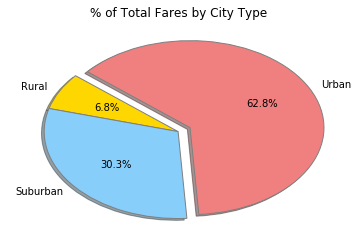

In [43]:
# Build Pie Chart
totalFare = cityRideCityType["Total Fare"]
totalFarePlot = totalFare.plot(kind='pie', figsize=(6, 4), explode=[0,0,0.1], startangle=140, 
               colors=["Gold", "lightskyblue", "lightcoral"],
               shadow=True,
               autopct="%1.1f%%",
               wedgeprops = {'edgecolor' : 'gray'} 
              )
plt.title("% of Total Fares by City Type")
plt.ylabel("")

# Save Figure
plt.savefig("totalFare.png")

# Show Figure
plt.show()

## Total Rides by City Type

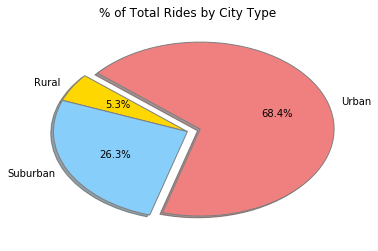

In [45]:
# Build Pie Chart
totalRide = cityRideCityType["Total Rides"]
totalRidePlot = totalRide.plot(kind='pie', figsize=(6, 4), explode=[0,0,0.1], startangle=140, 
               colors=["Gold", "lightskyblue", "lightcoral"],
               shadow=True,
               autopct="%1.1f%%",
               wedgeprops = {'edgecolor' : 'gray'} 
              )
plt.title("% of Total Rides by City Type")
plt.ylabel("")

# Save Figure
plt.savefig("totalRides.png")

# Show Figure
plt.show()

## Total Drivers by City Type

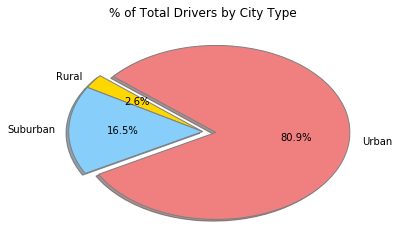

In [46]:
# Build Pie Chart
totalDriver = cityRideCityType["Total Drivers"]
totalDriverPlot = totalDriver.plot(kind='pie', figsize=(6, 4), explode=[0,0,0.1], startangle=140, 
               colors=["Gold", "lightskyblue", "lightcoral"],
               shadow=True,
               autopct="%1.1f%%",
               wedgeprops = {'edgecolor' : 'gray'} 
              )
plt.title("% of Total Drivers by City Type")
plt.ylabel("")

# Save Figure
plt.savefig("totalRides.png")

# Show Figure
plt.show()